In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_cumulative_balance = pd.read_csv('_bikeshare_2023_agg_week&station_v3.csv', low_memory=False, sep=';')

In [4]:
# Check info and dtypes of the dataframe
print("Info of the DataFrame:\n", '\n')
df_cumulative_balance.info()

Info of the DataFrame:
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41392 entries, 0 to 41391
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STATION                          41392 non-null  object 
 1   WEEK_NR                          41392 non-null  int64  
 2   SEASON                           41392 non-null  int64  
 3   LAT                              41392 non-null  float64
 4   LNG                              41392 non-null  float64
 5   COUNT_PICKUP                     41392 non-null  int64  
 6   COUNT_RETURN                     41392 non-null  int64  
 7   CUMULATIVE_BALANCE               41392 non-null  int64  
 8   CAPACITY                         41392 non-null  int64  
 9   IMBALANCE_FACTOR                 41392 non-null  float64
 10  IMB_FAC_CATEGORY                 41392 non-null  object 
 11  TURNOVER                         41392 non-null  float

Double records for '14th Street & ... " resolved. Consolidated in one station.

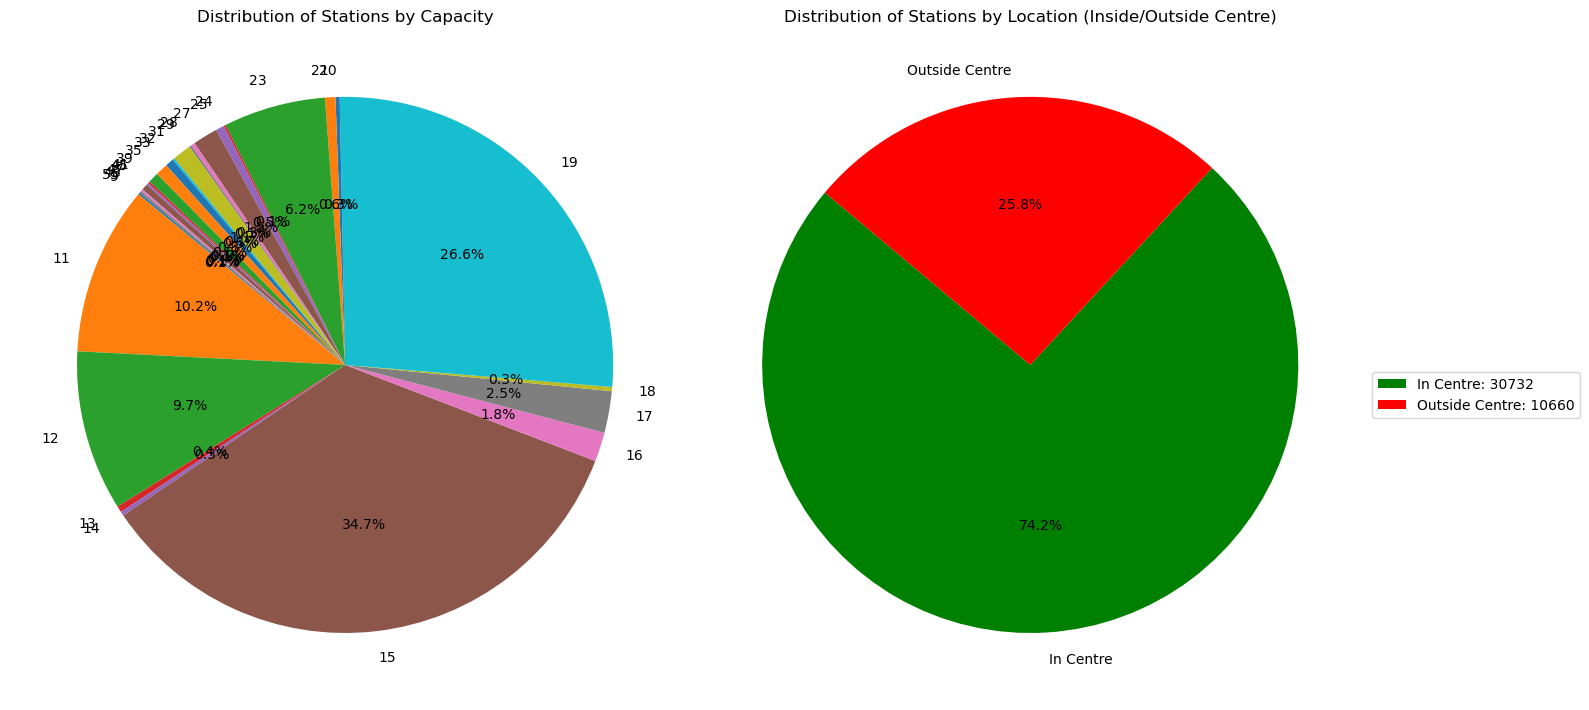

In [5]:
# Count the number of stations for each capacity value
capacity_counts = df_cumulative_balance['CAPACITY'].value_counts().sort_index()# Count the number of stations for each capacity value

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first pie chart for station capacity
axes[0].pie(capacity_counts, labels=capacity_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Stations by Capacity')

# Plot the second pie chart for 'inside_outside' category
df_cumulative_balance['inside_outside'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['green', 'red'], 
    labels=['In Centre', 'Outside Centre'], 
    ax=axes[1]
)
axes[1].set_title('Distribution of Stations by Location (Inside/Outside Centre)')
axes[1].set_ylabel('')  # Remove the y-axis label for better visualization

# Add a legend for the second pie chart
counts = df_cumulative_balance['inside_outside'].value_counts()
legend_labels = [f"In Centre: {counts['in_centre']}", f"Outside Centre: {counts['outside_centre']}"]
axes[1].legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.5))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


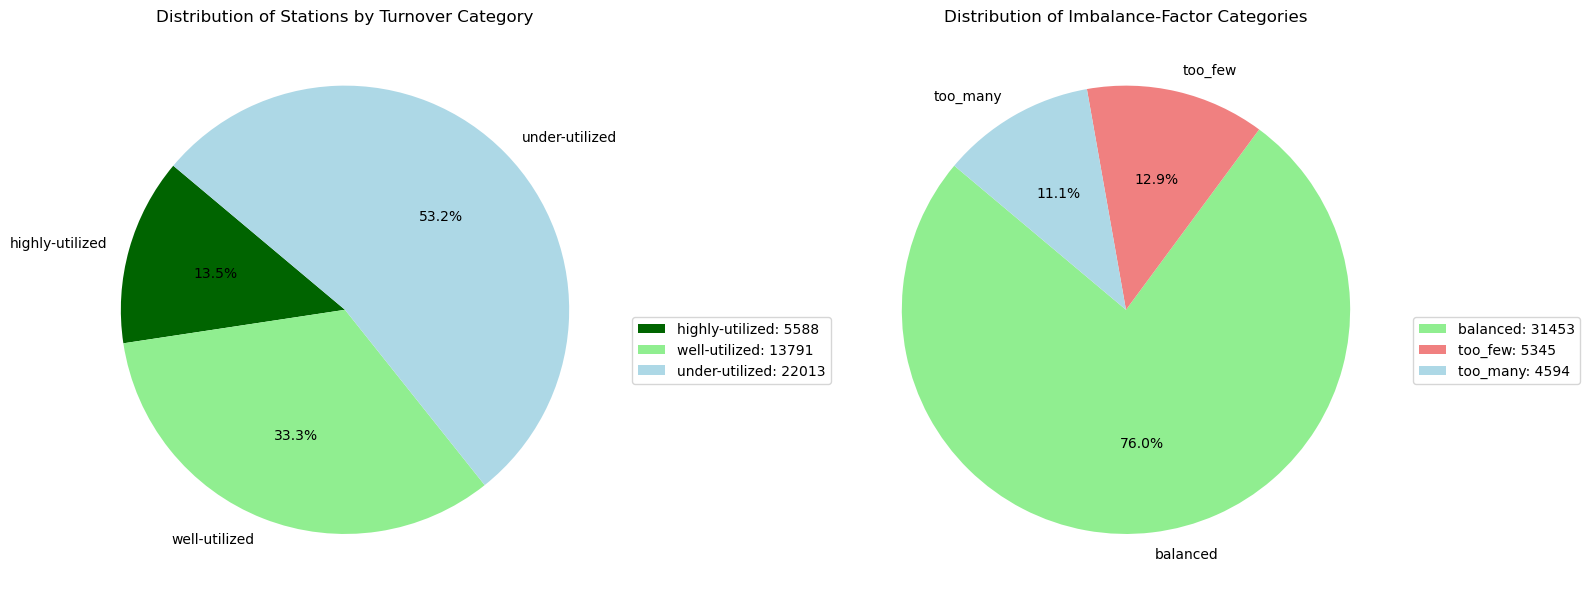

In [6]:
# Define the order and color scheme
category_order = ['highly-utilized', 'well-utilized', 'under-utilized']
category_colors = {
    'highly-utilized': 'darkgreen',
    'well-utilized': 'lightgreen',
    'under-utilized': 'lightblue',
}

# Count the number of stations in each turnover category
category_counts = df_cumulative_balance['TO_CATEGORY'].value_counts().reindex(category_order)

# Count the number of stations in each IMB_FAC_CATEGORY
imb_fac_category_counts = df_cumulative_balance['IMB_FAC_CATEGORY'].value_counts()


# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first pie chart for turnover categories
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, 
            colors=[category_colors[cat] for cat in category_order])
axes[0].set_title('Distribution of Stations by Turnover Category')

# Add a legend for the first pie chart
legend_labels_turnover = [f'{category}: {count}' for category, count in category_counts.items()]
axes[0].legend(legend_labels_turnover, loc='upper left', bbox_to_anchor=(1, 0.5))

# Plot the second pie chart for imbalance-factor categories
axes[1].pie(imb_fac_category_counts, labels=imb_fac_category_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=['lightgreen', 'lightcoral', 'lightblue'])
axes[1].set_title('Distribution of Imbalance-Factor Categories')

# Add a legend for the second pie chart
legend_labels_imbalance = [f'{category}: {count}' for category, count in imb_fac_category_counts.items()]
axes[1].legend(legend_labels_imbalance, loc='upper left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()
plt.show()


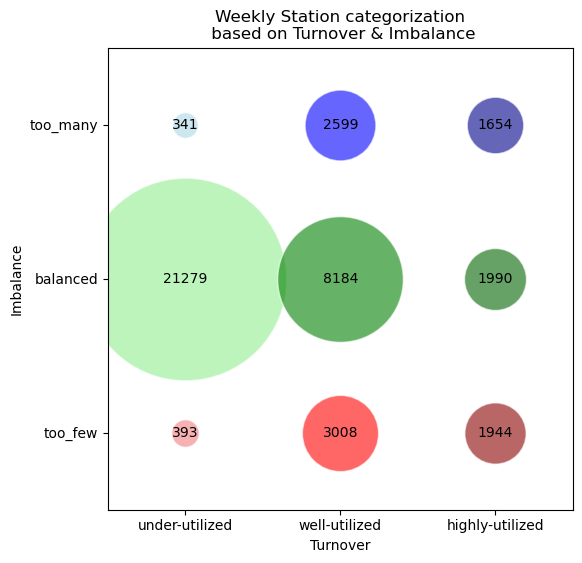

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories for the x and y axes
to_categories = ['under-utilized', 'well-utilized', 'highly-utilized']
imb_fac_categories = ['too_few', 'balanced', 'too_many']

# Create a DataFrame to store the counts
counts = pd.DataFrame(0, index=imb_fac_categories, columns=to_categories)

# Count the number of stations in each cross-category
for to_cat in to_categories:
    for imb_fac_cat in imb_fac_categories:
        counts.loc[imb_fac_cat, to_cat] = df_cumulative_balance[
            (df_cumulative_balance['TO_CATEGORY'] == to_cat) & 
            (df_cumulative_balance['IMB_FAC_CATEGORY'] == imb_fac_cat)
        ].shape[0]

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Define the color scheme for each quadrant
color_scheme = {
    ('too_many', 'under-utilized'): 'lightblue',
    ('too_many', 'well-utilized'): 'blue',
    ('too_many', 'highly-utilized'): 'darkblue',
    ('balanced', 'under-utilized'): 'lightgreen',
    ('balanced', 'well-utilized'): 'green',
    ('balanced', 'highly-utilized'): 'darkgreen',
    ('too_few', 'under-utilized'): 'lightcoral',
    ('too_few', 'well-utilized'): 'red',
    ('too_few', 'highly-utilized'): 'darkred'
}

# Create a scatter plot with circle sizes based on the counts and fixed color scheme
for i, imb_fac_cat in enumerate(imb_fac_categories):
    for j, to_cat in enumerate(to_categories):
        count = counts.loc[imb_fac_cat, to_cat]
        color = color_scheme.get((imb_fac_cat, to_cat), 'white')  # Use 'white' for no values
        ax.scatter(j, i, s=count*1.0, alpha=0.6, edgecolors='w', color=color)  # Increase size by 25%
        ax.text(j, i, count, ha='center', va='center', color='black')

# Set the x and y axis labels
ax.set_xticks(range(len(to_categories)))
ax.set_xticklabels(to_categories)
ax.set_yticks(range(len(imb_fac_categories)))
ax.set_yticklabels(imb_fac_categories)

# Set the axis labels
ax.set_xlabel('Turnover')
ax.set_ylabel('Imbalance')

# Set the title
ax.set_title('Weekly Station categorization\n based on Turnover & Imbalance')

# Adjust the x and y limits to add padding
ax.set_xlim(-0.5, len(to_categories) - 0.5)
ax.set_ylim(-0.5, len(imb_fac_categories) - 0.5)

plt.show()

In [8]:
import folium
from IPython.display import display, clear_output
import time

# Create a base map
m = folium.Map(location=[df_cumulative_balance['LAT'].mean(), df_cumulative_balance['LNG'].mean()], zoom_start=12)

# Function to determine color based on TO_IMB_CATEGORY
def get_color(to_imb_category):
    return color_scheme.get(to_imb_category, 'blue')

# Function to create a legend
def create_legend():
    legend_html = '''
    <div style="
        position: fixed; 
        bottom: 50px; left: 10px; width: 250px; height: 300px; 
        background-color: white; z-index:9999; font-size:14px; 
        border:2px solid grey; padding: 10px; opacity: 0.9;">
        <b>Legend</b><br>
        <i style="background: lightblue; width: 10px; height: 10px; display: inline-block;"></i> too_many & under-utilized<br>
        <i style="background: blue; width: 10px; height: 10px; display: inline-block;"></i> too_many & well-utilized<br>
        <i style="background: darkblue; width: 10px; height: 10px; display: inline-block;"></i> too_many & highly-utilized<br>
        <i style="background: lightgreen; width: 10px; height: 10px; display: inline-block;"></i> balanced & under-utilized<br>
        <i style="background: green; width: 10px; height: 10px; display: inline-block;"></i> balanced & well-utilized<br>
        <i style="background: darkgreen; width: 10px; height: 10px; display: inline-block;"></i> balanced & highly-utilized<br>
        <i style="background: lightcoral; width: 10px; height: 10px; display: inline-block;"></i> too_few & under-utilized<br>
        <i style="background: red; width: 10px; height: 10px; display: inline-block;"></i> too_few & well-utilized<br>
        <i style="background: darkred; width: 10px; height: 10px; display: inline-block;"></i> too_few & highly-utilized<br>
    </div>
    '''
    return legend_html

# Function to update the map for a specific week
def update_map(week_nr):
    # Clear all markers from the map
    m = folium.Map(location=[df_cumulative_balance['LAT'].mean(), df_cumulative_balance['LNG'].mean()], zoom_start=12)
    
    # Add stations to the map for the given week
    week_data = df_cumulative_balance[df_cumulative_balance['WEEK_NR'] == week_nr]
    for _, row in week_data.iterrows():
        folium.CircleMarker(
            location=[row['LAT'], row['LNG']],
            radius=5 + abs(row['IMBALANCE_FACTOR']) * 5,  # Scale the size based on IMBALANCE_FACTOR
            color=get_color((row['IMB_FAC_CATEGORY'], row['TO_CATEGORY'])),
            fill=True,
            fill_color=get_color((row['IMB_FAC_CATEGORY'], row['TO_CATEGORY'])),
            fill_opacity=0.6,
            popup=f"Station: {row['STATION']}\nTurnover: {row['TURNOVER']:.2f}\nImbalance Factor: {row['IMBALANCE_FACTOR']:.2f}"
        ).add_to(m)
    
    # Add a progress display
    progress_html = f'''
    <div style="position: fixed; 
                top: 10px; left: 50%; transform: translateX(-50%); 
                width: 200px; height: 30px; 
                border:2px solid grey; z-index:9999; font-size:16px;
                background-color:white; opacity: 0.8;
                text-align: center; line-height: 30px;">
    Week {week_nr} / 52
    </div>
    '''
    m.get_root().html.add_child(folium.Element(progress_html))
    
    # Add the legend to the map
    legend_html = create_legend()
    m.get_root().html.add_child(folium.Element(legend_html))
    
    return m

# Loop through each week and update the map
for week in range(1, 53):
    m = update_map(week)
    clear_output(wait=True)
    display(m)
    time.sleep(1)

# Week 47 shows dip due to Thanksgiving holiday
# Week 52 shows dip due to Christmas holiday

In [9]:
# Filter the DataFrame
filtered_df = df_cumulative_balance[
    (df_cumulative_balance['IMB_FAC_CATEGORY'] == 'too_many') &
    (df_cumulative_balance['TO_CATEGORY'] == 'under-utilized')
]

# Display the first 5 rows
filtered_df.head()

,STATION,WEEK_NR,SEASON,LAT,LNG,COUNT_PICKUP,COUNT_RETURN,CUMULATIVE_BALANCE,CAPACITY,IMBALANCE_FACTOR,...,TURNOVER,TO_CATEGORY,TO_IMB_CATEGORY,distance_to_centre_km,inside_outside,office_score,count_metrorail_st_walking_dist,leisure_score,residential_count,venue_count
469,10th St & L'Enfant Plaza SW,2,1,38.884323,-77.026010,53,71,18,23,0.8,...,0.3,under-utilized,under-utilized__too_many,3.1,in_centre,0.0,2,23.33,0,0
470,10th St & L'Enfant Plaza SW,3,1,38.884323,-77.026010,55,73,18,23,0.8,...,0.3,under-utilized,under-utilized__too_many,3.1,in_centre,0.0,2,23.33,0,0
548,10th St & Rhode Island Ave NE,29,4,38.922489,-76.992670,40,57,17,19,0.9,...,0.3,under-utilized,under-utilized__too_many,5.0,in_centre,0.0,1,0.00,0,0
731,11th & F St NW,4,1,38.897857,-77.026975,60,108,48,28,1.7,...,0.3,under-utilized,under-utilized__too_many,2.0,in_centre,1.5,2,5.95,0,2
732,11th & F St NW,5,1,38.897857,-77.026975,57,100,43,28,1.5,...,0.3,under-utilized,under-utilized__too_many,2.0,in_centre,1.5,2,5.95,0,2


In [10]:
# Count the number of records where TURNOVER >= 15
turnover_gte_15_count = df_cumulative_balance[df_cumulative_balance['TURNOVER'] >= 15].shape[0]
print("Number of records where TURNOVER >= 15:", turnover_gte_15_count)

Number of records where TURNOVER >= 15: 47


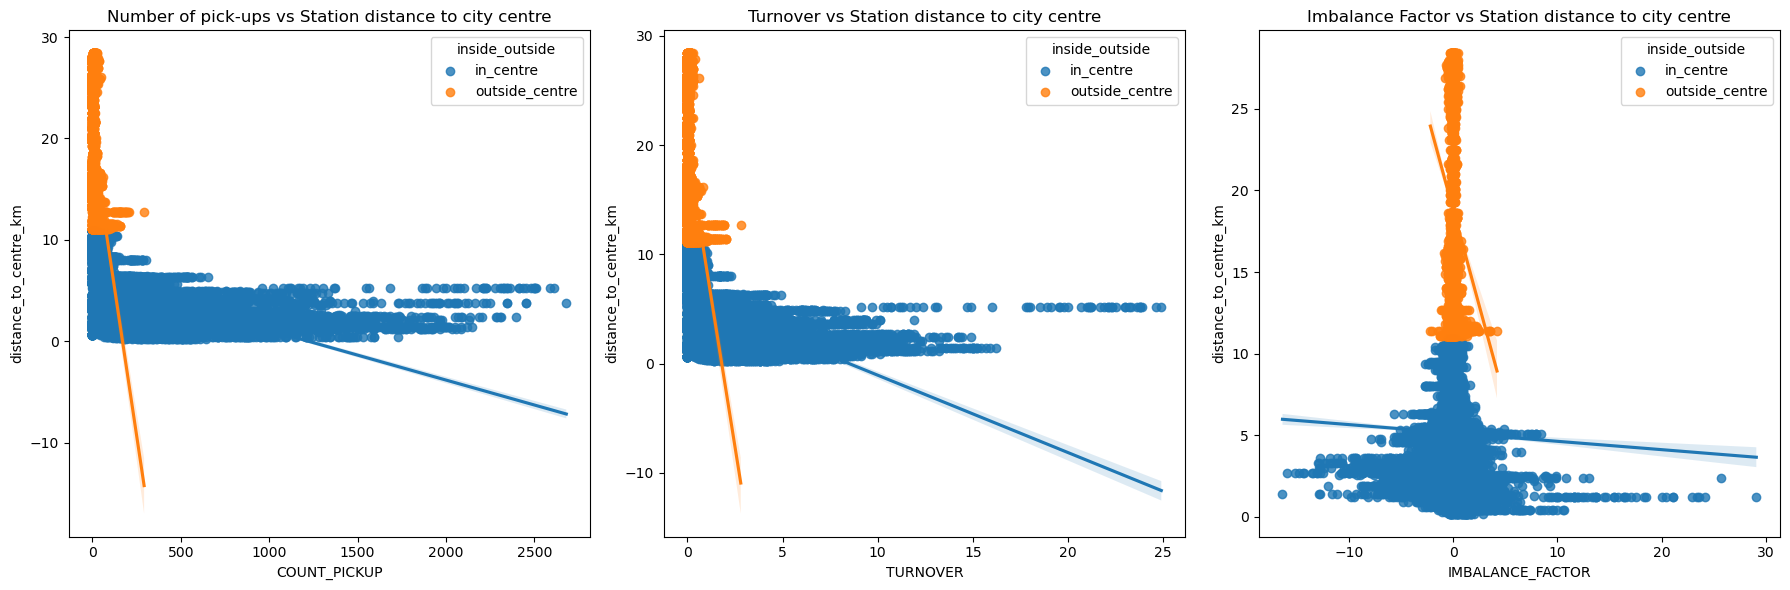

In [11]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define the hue variable and its unique values
hue_var = "inside_outside"
hue_values = df_cumulative_balance[hue_var].unique()
colors = sns.color_palette("tab10", len(hue_values))

# Plot 1: Correlation between apparent temperature and total rides
for hue_value, color in zip(hue_values, colors):
	subset = df_cumulative_balance[df_cumulative_balance[hue_var] == hue_value]
	sns.regplot(data=subset, x="COUNT_PICKUP", y="distance_to_centre_km", ax=axs[0], scatter_kws={'color': color}, line_kws={'color': color}, label=hue_value)
axs[0].set_title("Number of pick-ups vs Station distance to city centre")
axs[0].legend(title=hue_var)

# Plot 2: Correlation between temperature and member rides
for hue_value, color in zip(hue_values, colors):
	subset = df_cumulative_balance[df_cumulative_balance[hue_var] == hue_value]
	sns.regplot(data=subset, x="TURNOVER", y="distance_to_centre_km", ax=axs[1], scatter_kws={'color': color}, line_kws={'color': color}, label=hue_value)
axs[1].set_title("Turnover vs Station distance to city centre")
axs[1].legend(title=hue_var)

# Plot 3: Correlation between windspeed and casual rides
for hue_value, color in zip(hue_values, colors):
	subset = df_cumulative_balance[df_cumulative_balance[hue_var] == hue_value]
	sns.regplot(data=subset, x="IMBALANCE_FACTOR", y="distance_to_centre_km", ax=axs[2], scatter_kws={'color': color}, line_kws={'color': color}, label=hue_value)
axs[2].set_title("Imbalance Factor vs Station distance to city centre")
axs[2].legend(title=hue_var)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

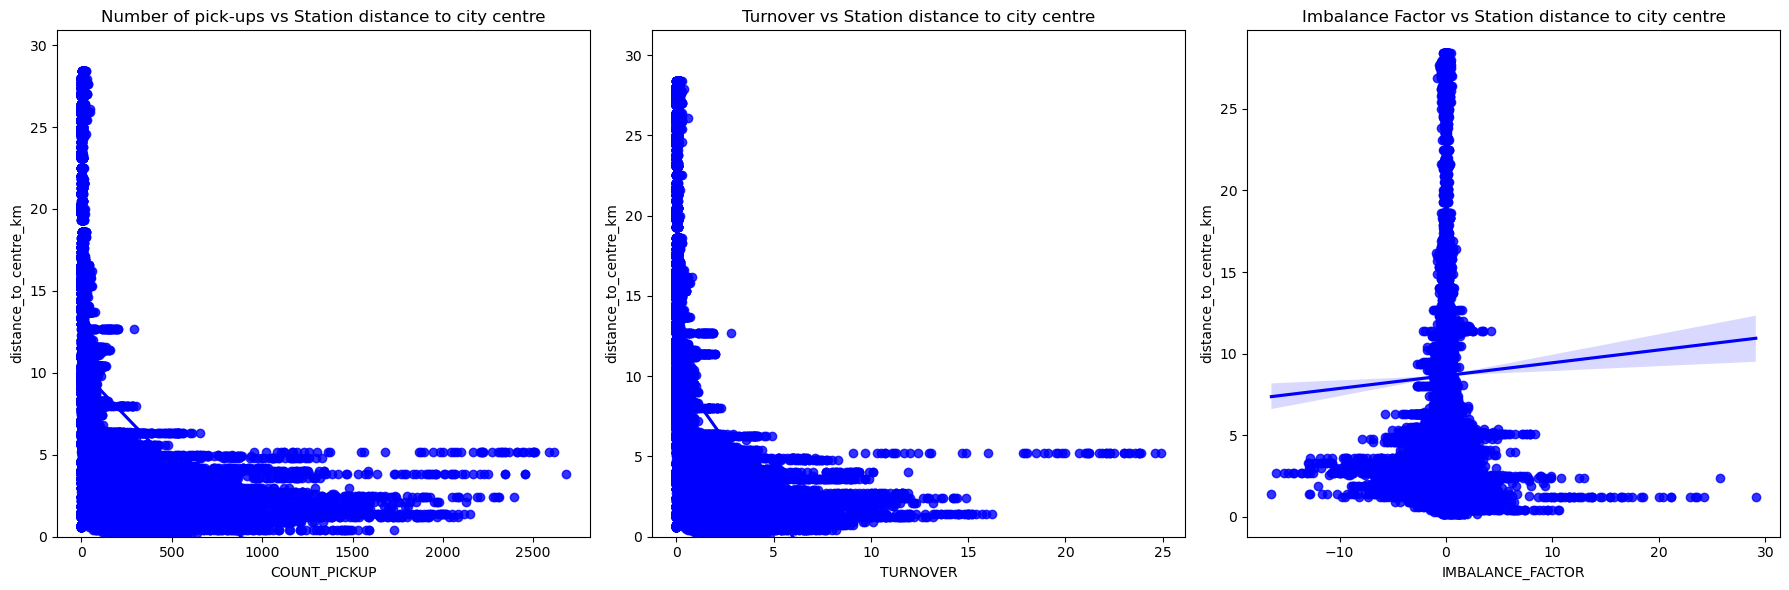

In [12]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Correlation between station distance to city centre and number of pick-ups
sns.regplot(data=df_cumulative_balance, x="COUNT_PICKUP", y="distance_to_centre_km", ax=axs[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[0].set_title("Number of pick-ups vs Station distance to city centre")
axs[0].set_ylim(bottom=0)  # Set minimum limit on the y-axis to 0

# Plot 2: Correlation between turnover and station distance to city centre
sns.regplot(data=df_cumulative_balance, x="TURNOVER", y="distance_to_centre_km", ax=axs[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[1].set_title("Turnover vs Station distance to city centre")
axs[1].set_ylim(bottom=0)  # Set minimum limit on the y-axis to 0

# Plot 3: Correlation between imbalance factor and station distance to city centre
sns.regplot(data=df_cumulative_balance, x="IMBALANCE_FACTOR", y="distance_to_centre_km", ax=axs[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[2].set_title("Imbalance Factor vs Station distance to city centre")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

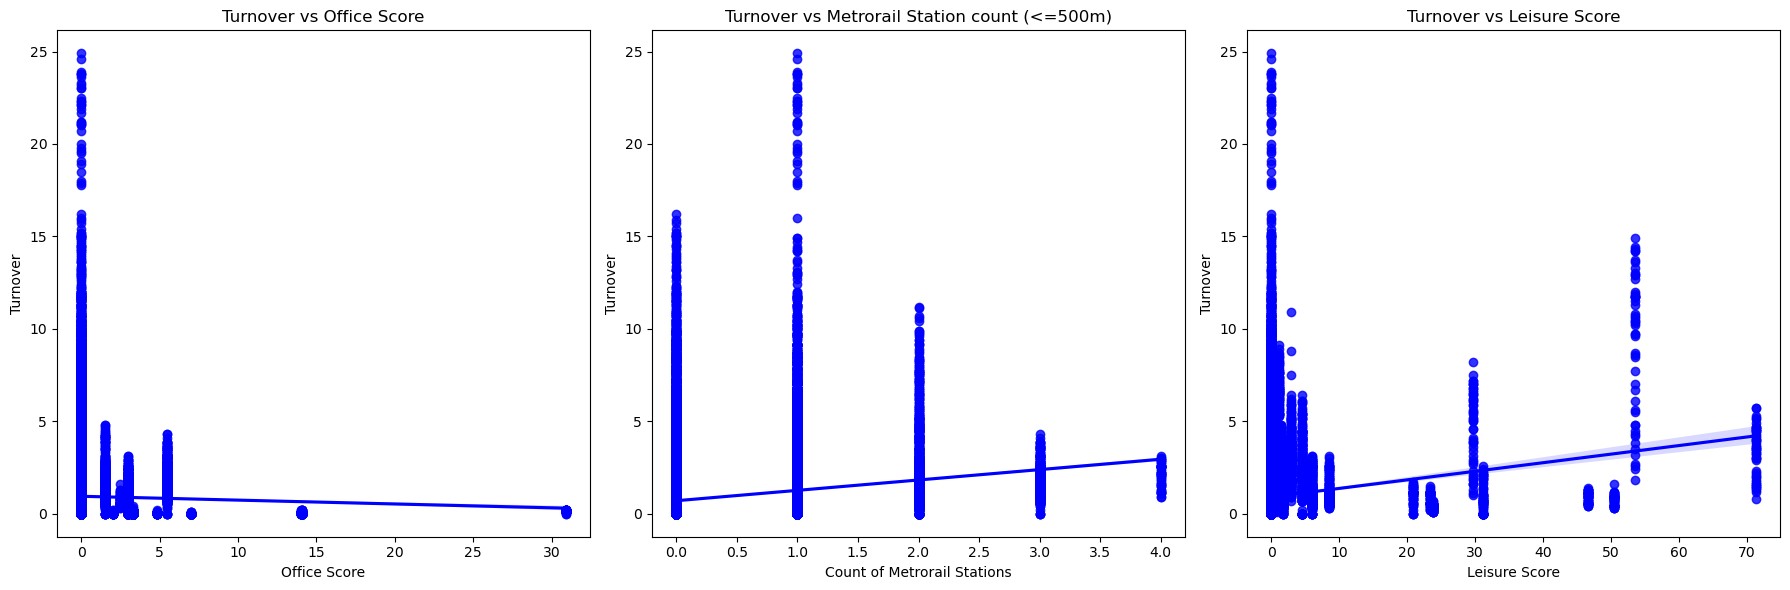

In [13]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Correlation between office score and turnover
sns.regplot(data=df_cumulative_balance, x="office_score", y="TURNOVER", ax=axs[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[0].set_title("Turnover vs Office Score")
axs[0].set_xlabel("Office Score")
axs[0].set_ylabel("Turnover")

# Plot 2: Correlation between count of metrorail stations within walking distance and turnover
sns.regplot(data=df_cumulative_balance, x="count_metrorail_st_walking_dist", y="TURNOVER", ax=axs[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[1].set_title("Turnover vs Metrorail Station count (<=500m)")
axs[1].set_xlabel("Count of Metrorail Stations")
axs[1].set_ylabel("Turnover")

# Plot 3: Correlation between leisure score and turnover
sns.regplot(data=df_cumulative_balance, x="leisure_score", y="TURNOVER", ax=axs[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[2].set_title("Turnover vs Leisure Score")
axs[2].set_xlabel("Leisure Score")
axs[2].set_ylabel("Turnover")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

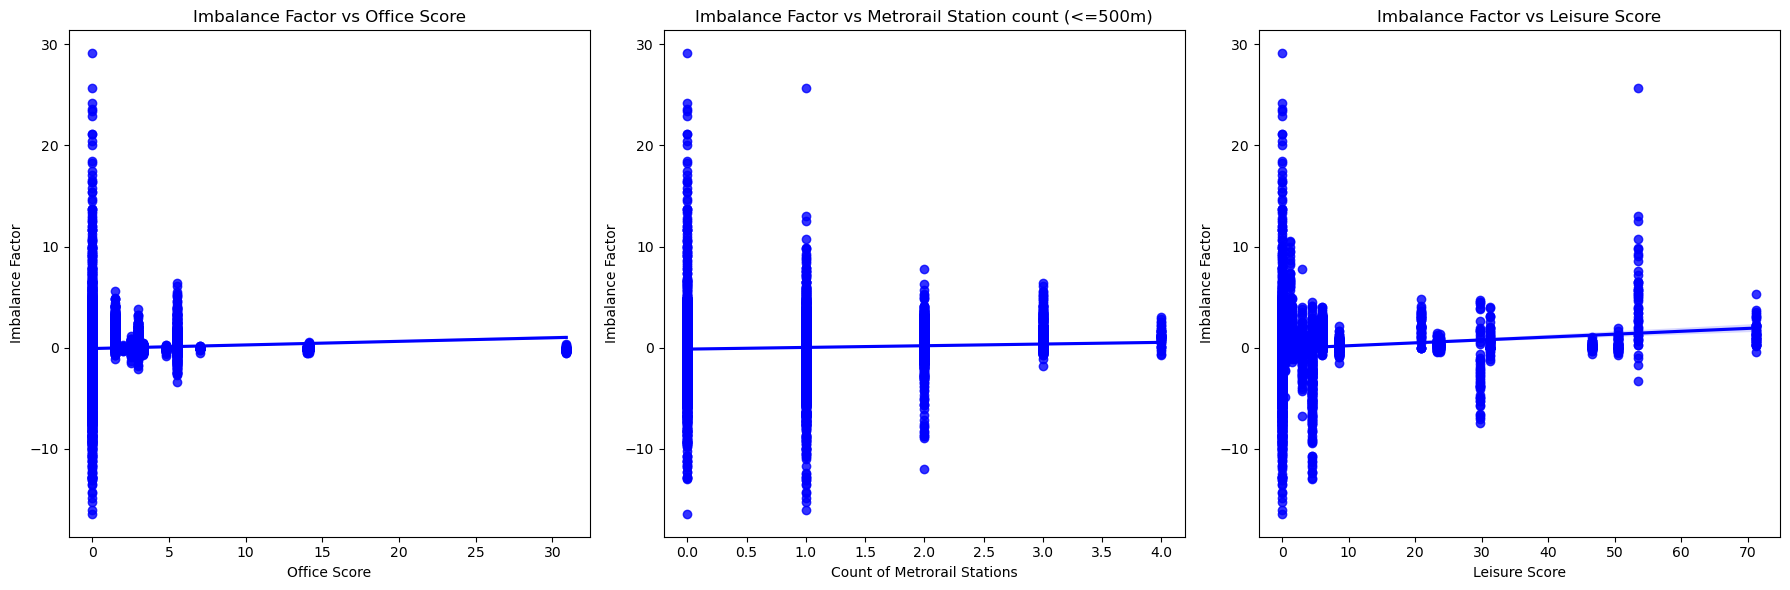

In [14]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Correlation between office score and imbalance factor
sns.regplot(data=df_cumulative_balance, x="office_score", y="IMBALANCE_FACTOR", ax=axs[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[0].set_title("Imbalance Factor vs Office Score")
axs[0].set_xlabel("Office Score")
axs[0].set_ylabel("Imbalance Factor")

# Plot 2: Correlation between count of metrorail stations within walking distance and imbalance factor
sns.regplot(data=df_cumulative_balance, x="count_metrorail_st_walking_dist", y="IMBALANCE_FACTOR", ax=axs[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[1].set_title("Imbalance Factor vs Metrorail Station count (<=500m)")
axs[1].set_xlabel("Count of Metrorail Stations")
axs[1].set_ylabel("Imbalance Factor")

# Plot 3: Correlation between leisure score and imbalance factor
sns.regplot(data=df_cumulative_balance, x="leisure_score", y="IMBALANCE_FACTOR", ax=axs[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[2].set_title("Imbalance Factor vs Leisure Score")
axs[2].set_xlabel("Leisure Score")
axs[2].set_ylabel("Imbalance Factor")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

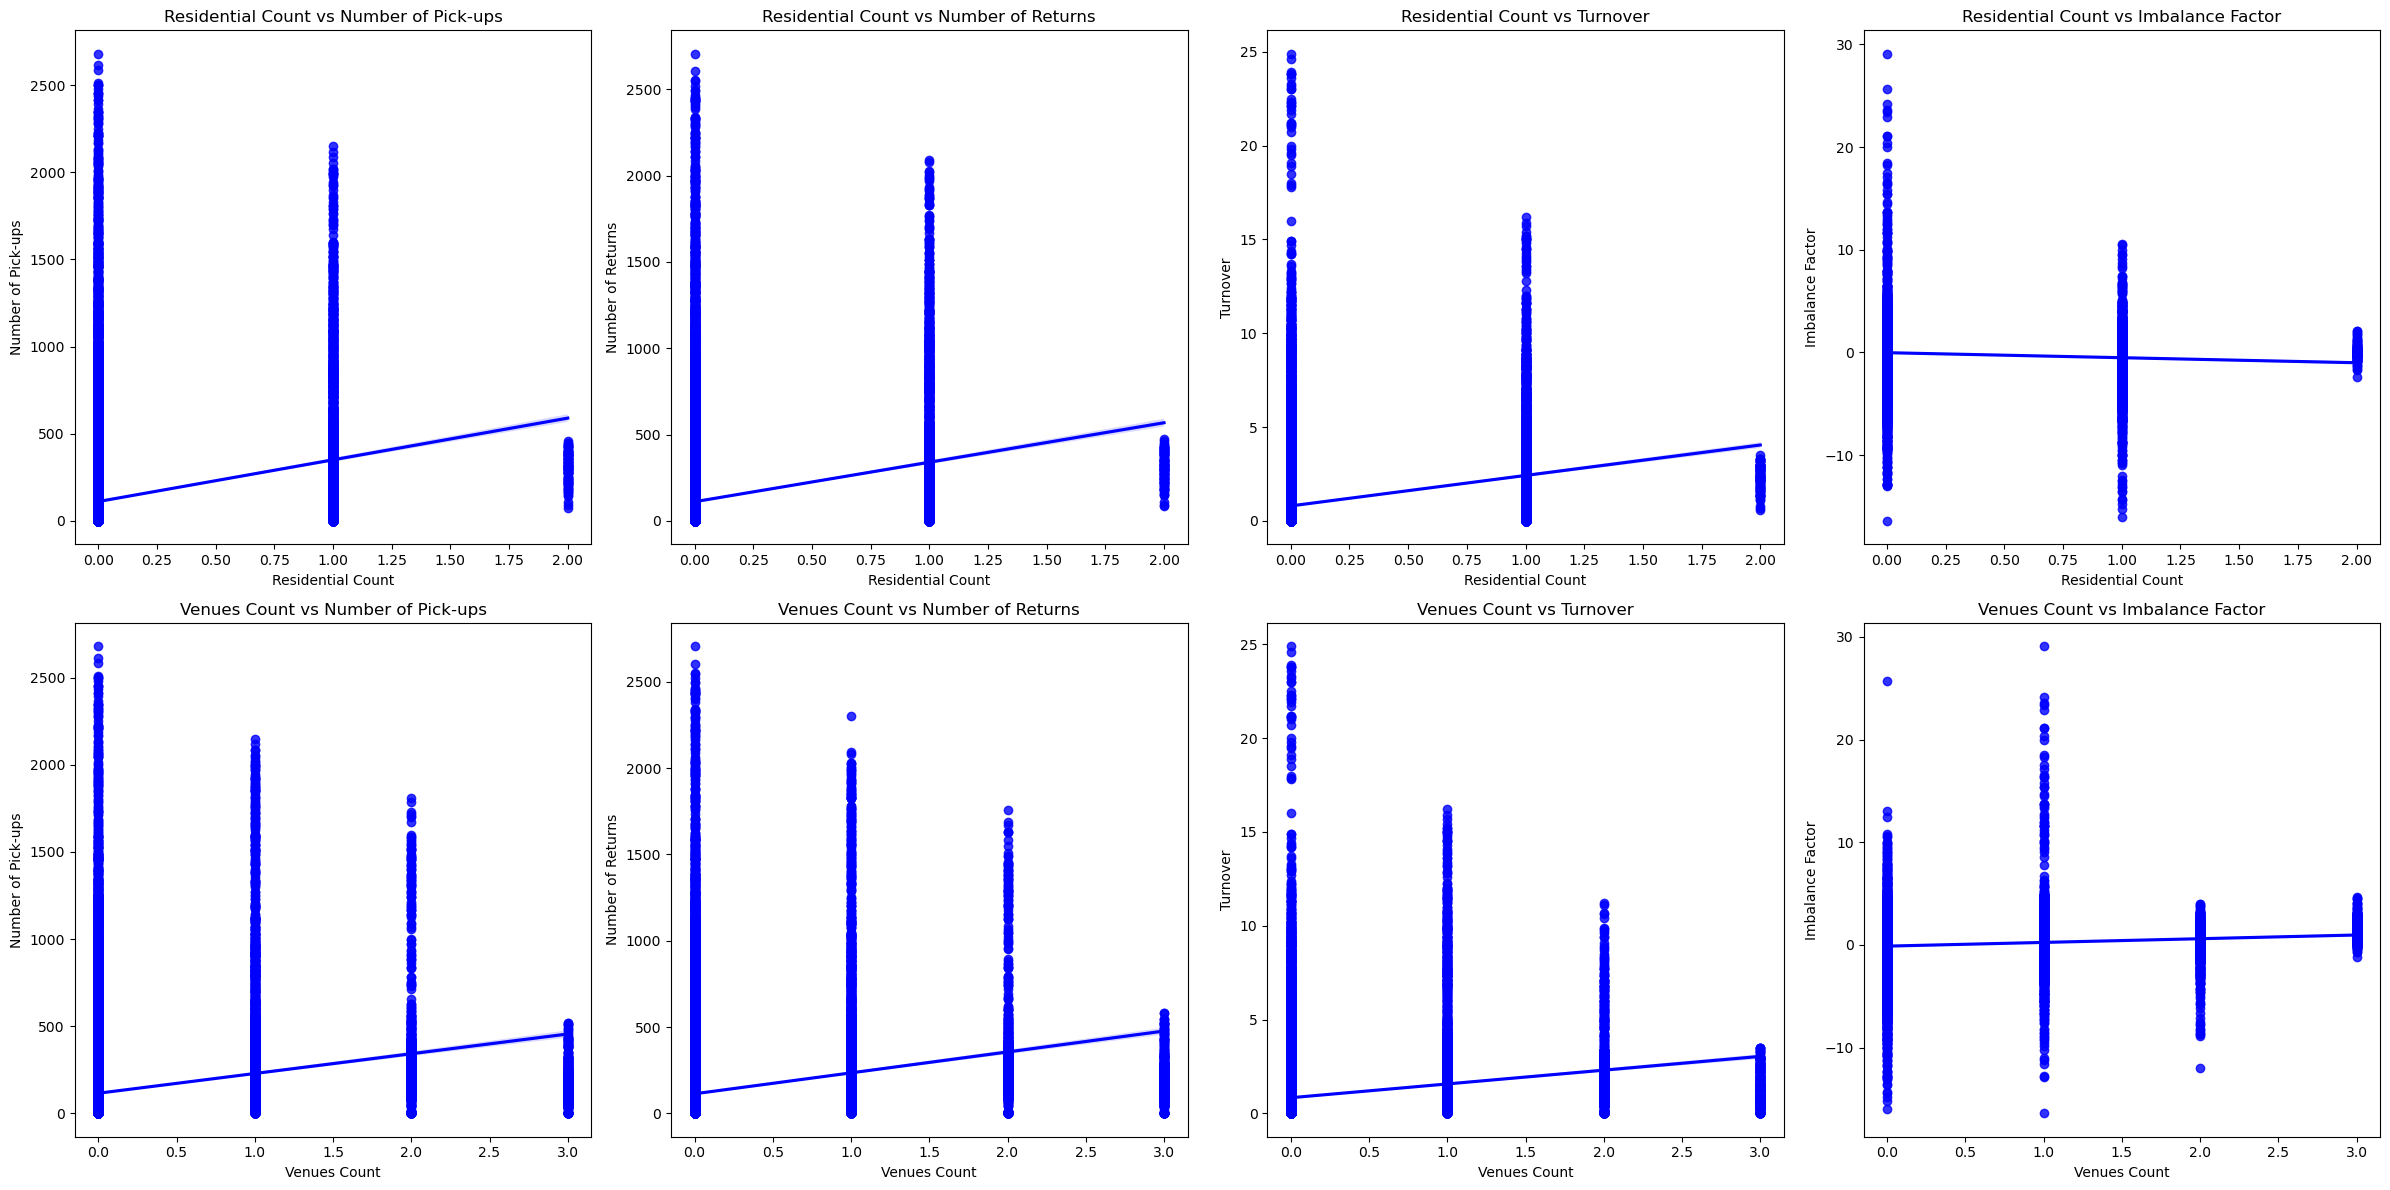

In [15]:
# Create a 2x4 grid of subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

# First row
# Plot 1: Correlation between residential count and number of pick-ups
sns.regplot(data=df_cumulative_balance, x="residential_count", y="COUNT_PICKUP", ax=axs[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[0, 0].set_title("Residential Count vs Number of Pick-ups")
axs[0, 0].set_xlabel("Residential Count")
axs[0, 0].set_ylabel("Number of Pick-ups")

# Plot 2: Correlation between residential count and number of returns
sns.regplot(data=df_cumulative_balance, x="residential_count", y="COUNT_RETURN", ax=axs[0, 1], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[0, 1].set_title("Residential Count vs Number of Returns")
axs[0, 1].set_xlabel("Residential Count")
axs[0, 1].set_ylabel("Number of Returns")

# Plot 3: Correlation between residential count and turnover
sns.regplot(data=df_cumulative_balance, x="residential_count", y="TURNOVER", ax=axs[0, 2], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[0, 2].set_title("Residential Count vs Turnover")
axs[0, 2].set_xlabel("Residential Count")
axs[0, 2].set_ylabel("Turnover")

# Plot 4: Correlation between residential count and imbalance factor
sns.regplot(data=df_cumulative_balance, x="residential_count", y="IMBALANCE_FACTOR", ax=axs[0, 3], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[0, 3].set_title("Residential Count vs Imbalance Factor")
axs[0, 3].set_xlabel("Residential Count")
axs[0, 3].set_ylabel("Imbalance Factor")

# Second row
# Plot 1: Correlation between venues count and number of pick-ups
sns.regplot(data=df_cumulative_balance, x="venue_count", y="COUNT_PICKUP", ax=axs[1, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[1, 0].set_title("Venues Count vs Number of Pick-ups")
axs[1, 0].set_xlabel("Venues Count")
axs[1, 0].set_ylabel("Number of Pick-ups")

# Plot 2: Correlation between venues count and number of returns
sns.regplot(data=df_cumulative_balance, x="venue_count", y="COUNT_RETURN", ax=axs[1, 1], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[1, 1].set_title("Venues Count vs Number of Returns")
axs[1, 1].set_xlabel("Venues Count")
axs[1, 1].set_ylabel("Number of Returns")

# Plot 3: Correlation between venues count and turnover
sns.regplot(data=df_cumulative_balance, x="venue_count", y="TURNOVER", ax=axs[1, 2], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[1, 2].set_title("Venues Count vs Turnover")
axs[1, 2].set_xlabel("Venues Count")
axs[1, 2].set_ylabel("Turnover")

# Plot 4: Correlation between venues count and imbalance factor
sns.regplot(data=df_cumulative_balance, x="venue_count", y="IMBALANCE_FACTOR", ax=axs[1, 3], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axs[1, 3].set_title("Venues Count vs Imbalance Factor")
axs[1, 3].set_xlabel("Venues Count")
axs[1, 3].set_ylabel("Imbalance Factor")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

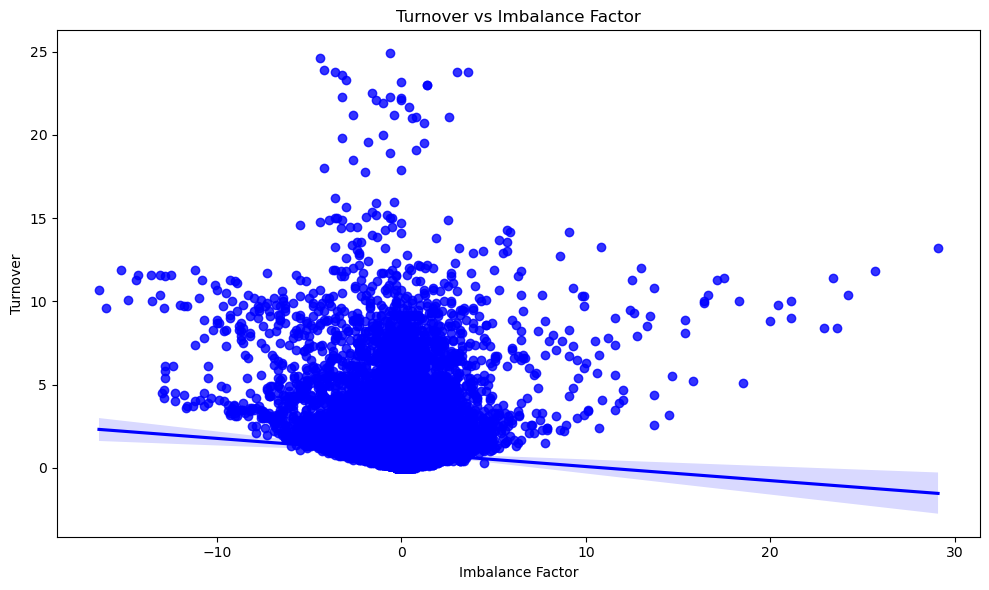

In [16]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Create the regression plot
sns.regplot(data=df_cumulative_balance, x="IMBALANCE_FACTOR", y="TURNOVER", ax=ax, scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
ax.set_title("Turnover vs Imbalance Factor")
ax.set_xlabel("Imbalance Factor")
ax.set_ylabel("Turnover")
# Show the plot
plt.tight_layout()
plt.show()


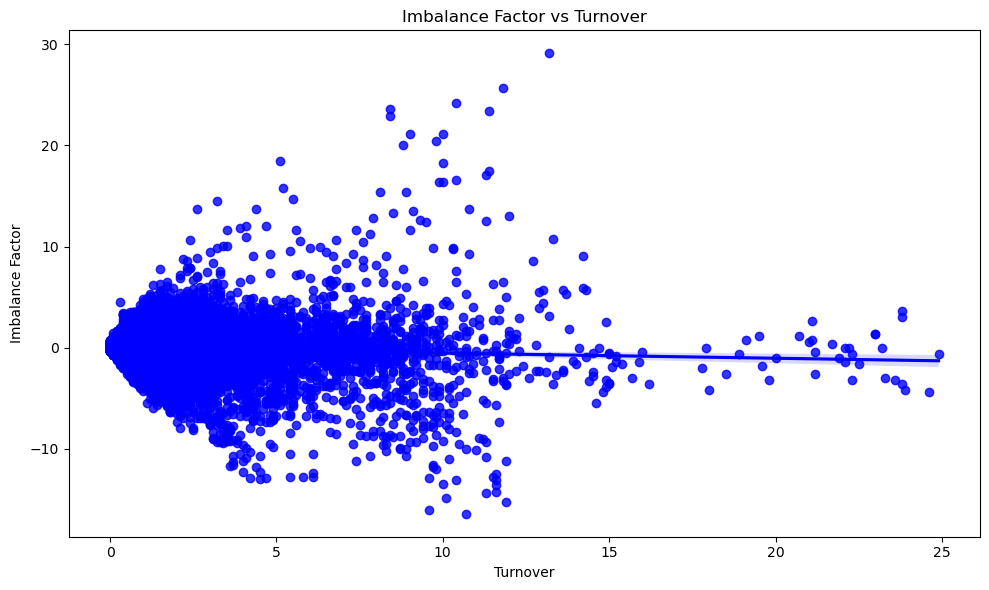

In [17]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Create the regression plot with switched axes
sns.regplot(data=df_cumulative_balance, x="TURNOVER", y="IMBALANCE_FACTOR", ax=ax, scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
ax.set_title("Imbalance Factor vs Turnover")
ax.set_xlabel("Turnover")
ax.set_ylabel("Imbalance Factor")
# Show the plot
plt.tight_layout()
plt.show()

MACHINE LEARNING

ML - UNIVARIATE

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [19]:
df_cumulative_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41392 entries, 0 to 41391
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STATION                          41392 non-null  object 
 1   WEEK_NR                          41392 non-null  int64  
 2   SEASON                           41392 non-null  int64  
 3   LAT                              41392 non-null  float64
 4   LNG                              41392 non-null  float64
 5   COUNT_PICKUP                     41392 non-null  int64  
 6   COUNT_RETURN                     41392 non-null  int64  
 7   CUMULATIVE_BALANCE               41392 non-null  int64  
 8   CAPACITY                         41392 non-null  int64  
 9   IMBALANCE_FACTOR                 41392 non-null  float64
 10  IMB_FAC_CATEGORY                 41392 non-null  object 
 11  TURNOVER                         41392 non-null  float64
 12  TO_CATEGORY       

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cumulative_balance['TURNOVER'].quantile(0.25)
Q3 = df_cumulative_balance['TURNOVER'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for 1.5*IQR, 2.5*IQR, and 3.5*IQR
bounds = {
    '1_5_IQR_TO': (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR),
    '2_5_IQR_TO': (Q1 - 2.5 * IQR, Q3 + 2.5 * IQR),
    '3_5_IQR_TO': (Q1 - 3.5 * IQR, Q3 + 3.5 * IQR),
}

# Initialize the new columns with 'No'
df_cumulative_balance['1_5_IQR_TO'] = 'No'
df_cumulative_balance['2_5_IQR_TO'] = 'No'
df_cumulative_balance['3_5_IQR_TO'] = 'No'

# Update the columns based on the outlier conditions
for col, (lower_bound, upper_bound) in bounds.items():
    df_cumulative_balance.loc[
        (df_cumulative_balance['TURNOVER'] < lower_bound) | (df_cumulative_balance['TURNOVER'] > upper_bound),
        col
    ] = 'Yes'

# Count the number of 'Yes' in each column
count_1_5_IQR = df_cumulative_balance['1_5_IQR_TO'].value_counts().get('Yes', 0)
count_2_5_IQR = df_cumulative_balance['2_5_IQR_TO'].value_counts().get('Yes', 0)
count_3_5_IQR = df_cumulative_balance['3_5_IQR_TO'].value_counts().get('Yes', 0)

# Print the counts
print("Number of outliers using 1.5*IQR:", count_1_5_IQR)
print("Number of outliers using 2.5*IQR:", count_2_5_IQR)
print("Number of outliers using 3.5*IQR:", count_3_5_IQR)

Number of outliers using 1.5*IQR: 3862
Number of outliers using 2.5*IQR: 2278
Number of outliers using 3.5*IQR: 1460


In [21]:
df_cumulative_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41392 entries, 0 to 41391
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STATION                          41392 non-null  object 
 1   WEEK_NR                          41392 non-null  int64  
 2   SEASON                           41392 non-null  int64  
 3   LAT                              41392 non-null  float64
 4   LNG                              41392 non-null  float64
 5   COUNT_PICKUP                     41392 non-null  int64  
 6   COUNT_RETURN                     41392 non-null  int64  
 7   CUMULATIVE_BALANCE               41392 non-null  int64  
 8   CAPACITY                         41392 non-null  int64  
 9   IMBALANCE_FACTOR                 41392 non-null  float64
 10  IMB_FAC_CATEGORY                 41392 non-null  object 
 11  TURNOVER                         41392 non-null  float64
 12  TO_CATEGORY       

In [22]:
# Drop rows where '1_5_IQR_TO' is 'Yes'
# df_cumulative_balance = df_cumulative_balance[df_cumulative_balance['3_5_IQR_TO'] == 'No']

# Display the updated DataFrame information
df_cumulative_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41392 entries, 0 to 41391
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STATION                          41392 non-null  object 
 1   WEEK_NR                          41392 non-null  int64  
 2   SEASON                           41392 non-null  int64  
 3   LAT                              41392 non-null  float64
 4   LNG                              41392 non-null  float64
 5   COUNT_PICKUP                     41392 non-null  int64  
 6   COUNT_RETURN                     41392 non-null  int64  
 7   CUMULATIVE_BALANCE               41392 non-null  int64  
 8   CAPACITY                         41392 non-null  int64  
 9   IMBALANCE_FACTOR                 41392 non-null  float64
 10  IMB_FAC_CATEGORY                 41392 non-null  object 
 11  TURNOVER                         41392 non-null  float64
 12  TO_CATEGORY       

In [23]:
df_cumulative_numeric = df_cumulative_balance.select_dtypes(include=['float64', 'int64']).dropna().copy()
df_cumulative_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41392 entries, 0 to 41391
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WEEK_NR                          41392 non-null  int64  
 1   SEASON                           41392 non-null  int64  
 2   LAT                              41392 non-null  float64
 3   LNG                              41392 non-null  float64
 4   COUNT_PICKUP                     41392 non-null  int64  
 5   COUNT_RETURN                     41392 non-null  int64  
 6   CUMULATIVE_BALANCE               41392 non-null  int64  
 7   CAPACITY                         41392 non-null  int64  
 8   IMBALANCE_FACTOR                 41392 non-null  float64
 9   TURNOVER                         41392 non-null  float64
 10  distance_to_centre_km            41392 non-null  float64
 11  office_score                     41392 non-null  float64
 12  count_metrorail_st

In [24]:
df_cumulative_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
WEEK_NR,41392.0,26.500000,15.008512,1.000000,13.750000,26.500000,39.250000,52.000000
SEASON,41392.0,3.057692,1.246756,1.000000,2.000000,4.000000,4.000000,4.000000
LAT,41392.0,38.910421,0.061509,38.782633,38.876805,38.900391,38.934044,39.125828
LNG,41392.0,-77.072649,0.098882,-77.368416,-77.097779,-77.046182,-77.011969,-76.825535
COUNT_PICKUP,41392.0,131.198517,250.010599,0.000000,6.000000,31.000000,147.000000,2680.000000
...,...,...,...,...,...,...,...,...
office_score,41392.0,0.340955,1.752573,0.000000,0.000000,0.000000,0.000000,30.900000
count_metrorail_st_walking_dist,41392.0,0.417085,0.625600,0.000000,0.000000,0.000000,1.000000,4.000000
leisure_score,41392.0,0.686859,4.691481,0.000000,0.000000,0.000000,0.000000,71.320000
residential_count,41392.0,0.085427,0.288369,0.000000,0.000000,0.000000,0.000000,2.000000


OUTLIER CHECK

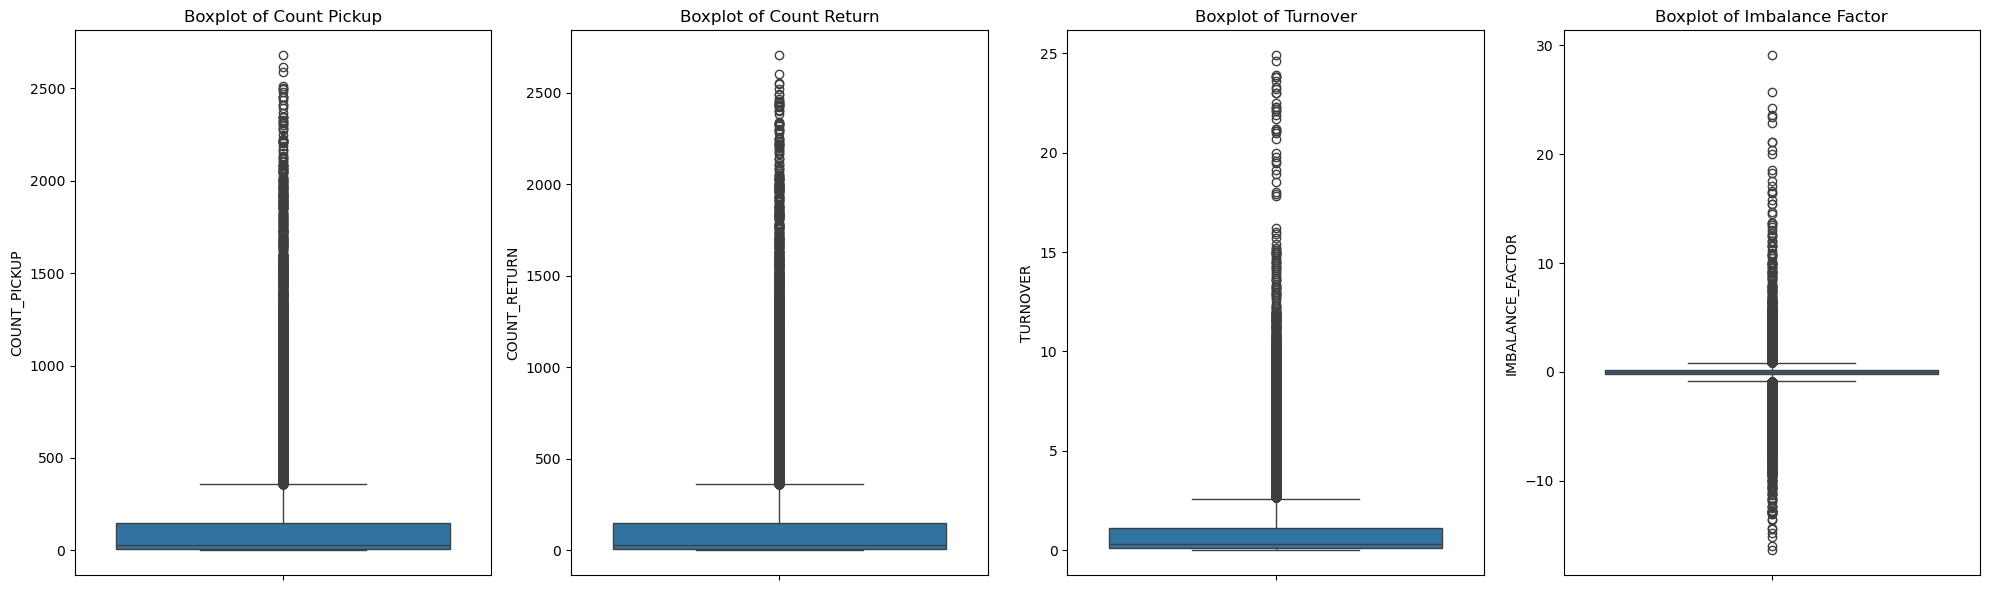

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 4 columns for the box plots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Boxplot for 'COUNT_PICKUP'
sns.boxplot(data=df_cumulative_balance, y='COUNT_PICKUP', ax=axs[0])
axs[0].set_title('Boxplot of Count Pickup')
axs[0].set_ylabel('COUNT_PICKUP')

# Boxplot for 'COUNT_RETURN'
sns.boxplot(data=df_cumulative_balance, y='COUNT_RETURN', ax=axs[1])
axs[1].set_title('Boxplot of Count Return')
axs[1].set_ylabel('COUNT_RETURN')

# Boxplot for 'TURNOVER'
sns.boxplot(data=df_cumulative_balance, y='TURNOVER', ax=axs[2])
axs[2].set_title('Boxplot of Turnover')
axs[2].set_ylabel('TURNOVER')

# Boxplot for 'IMBALANCE_FACTOR'
sns.boxplot(data=df_cumulative_balance, y='IMBALANCE_FACTOR', ax=axs[3])
axs[3].set_title('Boxplot of Imbalance Factor')
axs[3].set_ylabel('IMBALANCE_FACTOR')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [26]:
pickups = df_cumulative_numeric["COUNT_PICKUP"]
imbalance = df_cumulative_numeric["IMBALANCE_FACTOR"]
turnover = df_cumulative_numeric["TURNOVER"]
distance = df_cumulative_numeric["distance_to_centre_km"]
office = df_cumulative_numeric["office_score"]
metro_count = df_cumulative_numeric["count_metrorail_st_walking_dist"]
leisure = df_cumulative_numeric["leisure_score"]
residential = df_cumulative_numeric["residential_count"]
venues = df_cumulative_numeric["venue_count"]

print(pickups.shape)
print(imbalance.shape)
print(turnover.shape)
print(distance.shape)
print(office.shape)
print(metro_count.shape)
print(leisure.shape)
print(residential.shape)
print(venues.shape)

print(pickups.isnull().sum())
print(imbalance.isnull().sum())
print(turnover.isnull().sum())
print(distance.isnull().sum())
print(office.isnull().sum())
print(metro_count.isnull().sum())
print(leisure.isnull().sum())
print(residential.isnull().sum())
print(venues.isnull().sum())

(41392,)
(41392,)
(41392,)
(41392,)
(41392,)
(41392,)
(41392,)
(41392,)
(41392,)
0
0
0
0
0
0
0
0
0


In [27]:
# Reshape the dfs to have value for the column instead of a null.

pickups = pickups.values.reshape(-1, 1)
imbalance = imbalance.values.reshape(-1, 1)
turnover = turnover.values.reshape(-1, 1)
distance = distance.values.reshape(-1, 1)
office = office.values.reshape(-1, 1)
metro_count = metro_count.values.reshape(-1, 1)
leisure = leisure.values.reshape(-1, 1)
residential = residential.values.reshape(-1, 1)
venues = venues.values.reshape(-1, 1)

print(pickups.shape)
print(imbalance.shape)
print(turnover.shape)
print(distance.shape)
print(office.shape)
print(metro_count.shape)
print(leisure.shape)
print(residential.shape)
print(venues.shape)

(41392, 1)
(41392, 1)
(41392, 1)
(41392, 1)
(41392, 1)
(41392, 1)
(41392, 1)
(41392, 1)
(41392, 1)


In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

pickups_train, pickups_test, distance_to_centre_train, distance_to_centre_test = train_test_split(pickups, distance, test_size=0.2, random_state=420)

pickups_train

array([[185],
       [152],
       [  4],
       ...,
       [580],
       [ 49],
       [172]], dtype=int64)

In [29]:
distance_to_centre_train

array([[ 1.8],
       [ 4.5],
       [28. ],
       ...,
       [ 1.6],
       [ 4.7],
       [ 2.4]])

Coefficients: [[-14.14288334]]
Intercept: [252.77554662]
R^2 Score: 0.16188096563903465
Mean Absolute Error (MAE) based on Distance to Centre is: 138.87507668928316
Mean Squared Error (MSE) based on Distance to Centre is: 55935.166636346126
Root Mean Squared Error (RMSE) based on Distance to Centre is: 236.50616616981918
The accuracy of the ML model based on Distance to Centre is: 16.188096563903464 %


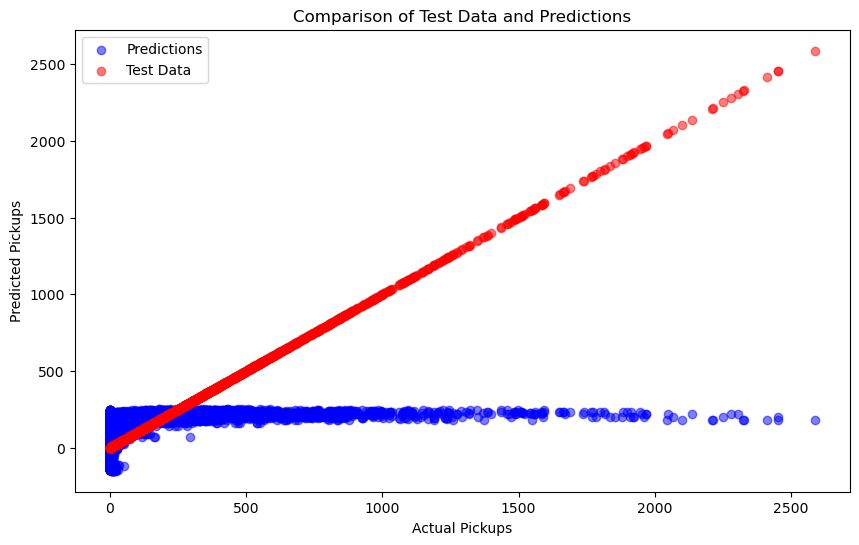

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create a linear regression model
model = linear_model.LinearRegression()

# Fit the model using the training data
model.fit(distance_to_centre_train, pickups_train)

# Predict the values for the test data
predictions = model.predict(distance_to_centre_test)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model using R^2 score
r2_score = model.score(distance_to_centre_test, pickups_test)
print("R^2 Score:", r2_score)

# Calculate accuracy metrics
mae = mean_absolute_error(pickups_test, predictions)
mse = mean_squared_error(pickups_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE) based on Distance to Centre is:", mae)
print("Mean Squared Error (MSE) based on Distance to Centre is:", mse)
print("Root Mean Squared Error (RMSE) based on Distance to Centre is:", rmse)

# Predict values using test data.
reg_area_score = (model.score(distance_to_centre_test, pickups_test) * 100)
print("The accuracy of the ML model based on Distance to Centre is:", reg_area_score , "%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(pickups_test, predictions, color='blue', alpha=0.5, label='Predictions')
plt.scatter(pickups_test, pickups_test, color='red', alpha=0.5, label='Test Data')
plt.legend()
plt.xlabel('Actual Pickups')
plt.ylabel('Predicted Pickups')
plt.title('Comparison of Test Data and Predictions')
plt.show()


R^2 Score based on Distance to Centre is: 0.36443032015499577
Mean Absolute Error (MAE) based on Distance to Centre is: 95.17161928339249
Mean Squared Error (MSE) based on Distance to Centre is: 42417.2396684029
Root Mean Squared Error (RMSE) based on Distance to Centre is: 205.95446018089265


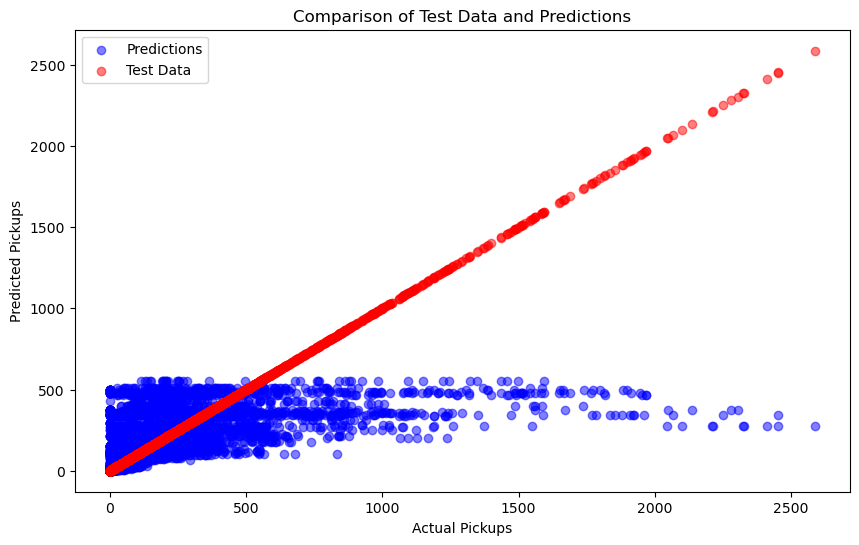

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model using the training data
model.fit(distance_to_centre_train, pickups_train.ravel())

# Predict the values for the test data
predictions = model.predict(distance_to_centre_test)

# Evaluate the model using R^2 score
r2_score = model.score(distance_to_centre_test, pickups_test)
print("R^2 Score based on Distance to Centre is:", r2_score)

# Calculate accuracy metrics
mae = mean_absolute_error(pickups_test, predictions)
mse = mean_squared_error(pickups_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE) based on Distance to Centre is:", mae)
print("Mean Squared Error (MSE) based on Distance to Centre is:", mse)
print("Root Mean Squared Error (RMSE) based on Distance to Centre is:", rmse)

# Predict values using test data.
# reg_area_score = (model.score(distance_to_centre_test, pickups_test) * 100)
# print("The accuracy of the ML model based on Distance to Centre is:", reg_area_score , "%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(pickups_test, predictions, color='blue', alpha=0.5, label='Predictions')
plt.scatter(pickups_test, pickups_test, color='red', alpha=0.5, label='Test Data')
plt.legend()
plt.xlabel('Actual Pickups')
plt.ylabel('Predicted Pickups')
plt.title('Comparison of Test Data and Predictions')
plt.show()


R^2 Score based on Distance to Centre is: 0.3597392682220286
Mean Absolute Error (MAE) based on Distance to Centre is: 0.6347912581362902
Mean Squared Error (MSE) based on Distance to Centre is: 1.6766692268609058
Root Mean Squared Error (RMSE) based on Distance to Centre is: 1.2948626285675657


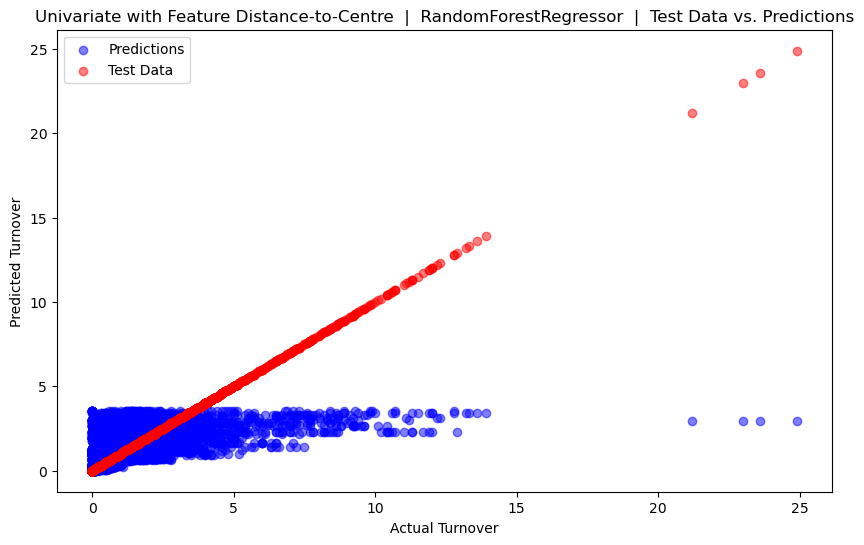

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create new train and test datasets for 'turnover' and 'distance'
distance_train, distance_test, turnover_train, turnover_test = train_test_split(
    distance, turnover, test_size=0.2, random_state=42
)

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model using the training data
model.fit(distance_train, turnover_train.ravel())

# Predict the values for the test data
predictions = model.predict(distance_test)

# Evaluate the model using R^2 score
r2_score = model.score(distance_test, turnover_test)
print("R^2 Score based on Distance to Centre is:", r2_score)

# Calculate accuracy metrics
mae = mean_absolute_error(turnover_test, predictions)
mse = mean_squared_error(turnover_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE) based on Distance to Centre is:", mae)
print("Mean Squared Error (MSE) based on Distance to Centre is:", mse)
print("Root Mean Squared Error (RMSE) based on Distance to Centre is:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(turnover_test, predictions, color='blue', alpha=0.5, label='Predictions')
plt.scatter(turnover_test, turnover_test, color='red', alpha=0.5, label='Test Data')
plt.legend()
plt.xlabel('Actual Turnover')
plt.ylabel('Predicted Turnover')
plt.title('Univariate with Feature Distance-to-Centre  |  RandomForestRegressor  |  Test Data vs. Predictions')
plt.show()

INSIDE MODEL PERFROMS BETTER WHEN ASKED TO PREDICT distance_to_centre and using number of pickups as indicator
See below

R^2 Score: 0.5084483363741978
Mean Absolute Error (MAE) based on Number of average daily pickups is: 3.454712955265289
Mean Squared Error (MSE) based on Number of average daily pickups is: 24.541648022008495
Root Mean Squared Error (RMSE) based on Number of average daily pickups is: 4.95395276743819
The accuracy of the ML model based on Number of average daily pickups is: 50.84483363741978 %


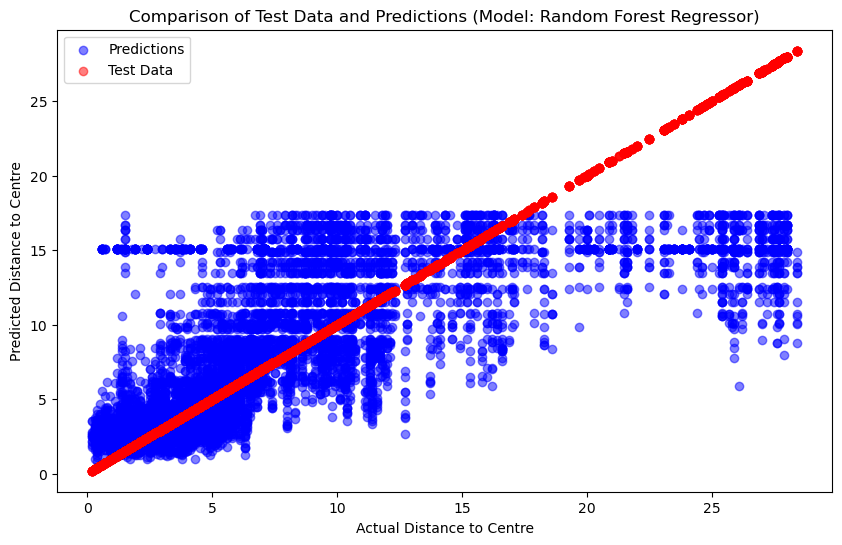

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model using the training data
model.fit(pickups_train, distance_to_centre_train.ravel())

# Predict the values for the test data
predictions = model.predict(pickups_test)

# Evaluate the model using R^2 score
r2_score = model.score(pickups_test, distance_to_centre_test)
print("R^2 Score:", r2_score)

# Calculate accuracy metrics
mae = mean_absolute_error(distance_to_centre_test, predictions)
mse = mean_squared_error(distance_to_centre_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE) based on Number of average daily pickups is:", mae)
print("Mean Squared Error (MSE) based on Number of average daily pickups is:", mse)
print("Root Mean Squared Error (RMSE) based on Number of average daily pickups is:", rmse)

# Predict values using test data.
reg_area_score = (model.score(pickups_test, distance_to_centre_test) * 100)
print("The accuracy of the ML model based on Number of average daily pickups is:", reg_area_score , "%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(distance_to_centre_test, predictions, color='blue', alpha=0.5, label='Predictions')
plt.scatter(distance_to_centre_test, distance_to_centre_test, color='red', alpha=0.5, label='Test Data')
plt.legend()
plt.xlabel('Actual Distance to Centre')
plt.ylabel('Predicted Distance to Centre')
plt.title('Comparison of Test Data and Predictions (Model: Random Forest Regressor)')
plt.show()


ML - POLYNOMINAL

still find a good example (imbalance_factor x turnover)

In [34]:
import ipywidgets as widgets

# Extract 'IMBALANCE_FACTOR' and 'TURNOVER' from df_cumulative_balance
x = df_cumulative_balance['IMBALANCE_FACTOR'].values
y = df_cumulative_balance['TURNOVER'].values

# Function to fit and plot polynomial regression
def plot_polynomial_regression(degree):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    y_pred = polynomial(x)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data")
    plt.plot(np.sort(x), y_pred[np.argsort(x)], color='red', label="Polynomial Regression (Degree {})".format(degree))
    plt.legend()
    plt.xlabel("Imbalance Factor")
    plt.ylabel("Turnover")
    plt.title("Polynomial Regression")

# Update the interactive widget and display
degree_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Degree')
output = widgets.interactive_output(plot_polynomial_regression, {'degree': degree_slider})
display(degree_slider, output)


IntSlider(value=1, description='Degree', max=10, min=1)

Output()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate polynomial regression for a given degree
def evaluate_polynomial_regression(degree):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    y_pred = polynomial(x)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return mae, mse, rmse, r2

# Evaluate for degrees 1 to 10
for degree in range(1, 11):
    mae, mse, rmse, r2 = evaluate_polynomial_regression(degree)
    print(f"Degree {degree}:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print()


Degree 1:
  Mean Absolute Error (MAE): 1.0173
  Mean Squared Error (MSE): 2.8586
  Root Mean Squared Error (RMSE): 1.6907
  R² Score: 0.0043

Degree 2:
  Mean Absolute Error (MAE): 0.9469
  Mean Squared Error (MSE): 2.5365
  Root Mean Squared Error (RMSE): 1.5926
  R² Score: 0.1165

Degree 3:
  Mean Absolute Error (MAE): 0.9256
  Mean Squared Error (MSE): 2.4740
  Root Mean Squared Error (RMSE): 1.5729
  R² Score: 0.1383

Degree 4:
  Mean Absolute Error (MAE): 0.9135
  Mean Squared Error (MSE): 2.4219
  Root Mean Squared Error (RMSE): 1.5563
  R² Score: 0.1564

Degree 5:
  Mean Absolute Error (MAE): 0.8906
  Mean Squared Error (MSE): 2.3430
  Root Mean Squared Error (RMSE): 1.5307
  R² Score: 0.1839

Degree 6:
  Mean Absolute Error (MAE): 0.8910
  Mean Squared Error (MSE): 2.3400
  Root Mean Squared Error (RMSE): 1.5297
  R² Score: 0.1849

Degree 7:
  Mean Absolute Error (MAE): 0.8742
  Mean Squared Error (MSE): 2.2736
  Root Mean Squared Error (RMSE): 1.5079
  R² Score: 0.2081

Degree

MULTIVARIATE Regression

In [36]:
from sklearn.linear_model import LinearRegression

df_cumulative_numeric

,WEEK_NR,SEASON,LAT,LNG,COUNT_PICKUP,COUNT_RETURN,CUMULATIVE_BALANCE,CAPACITY,IMBALANCE_FACTOR,TURNOVER,distance_to_centre_km,office_score,count_metrorail_st_walking_dist,leisure_score,residential_count,venue_count
0,1,1,38.895914,-77.026064,163,191,28,15,1.9,1.6,2.2,1.5,4,5.95,0,2
1,2,1,38.895914,-77.026064,124,139,15,15,1.0,1.2,2.2,1.5,4,5.95,0,2
2,3,1,38.895914,-77.026064,123,137,14,15,0.9,1.2,2.2,1.5,4,5.95,0,2
3,4,1,38.895914,-77.026064,95,121,26,15,1.7,0.9,2.2,1.5,4,5.95,0,2
4,5,1,38.895914,-77.026064,96,113,17,15,1.1,0.9,2.2,1.5,4,5.95,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41387,48,4,38.964459,-77.010759,0,0,0,15,0.0,0.0,7.1,0.0,0,0.00,0,0
41388,49,4,38.964459,-77.010759,0,0,0,15,0.0,0.0,7.1,0.0,0,0.00,0,0
41389,50,4,38.964459,-77.010759,0,0,0,15,0.0,0.0,7.1,0.0,0,0.00,0,0
41390,51,4,38.964459,-77.010759,0,0,0,15,0.0,0.0,7.1,0.0,0,0.00,0,0


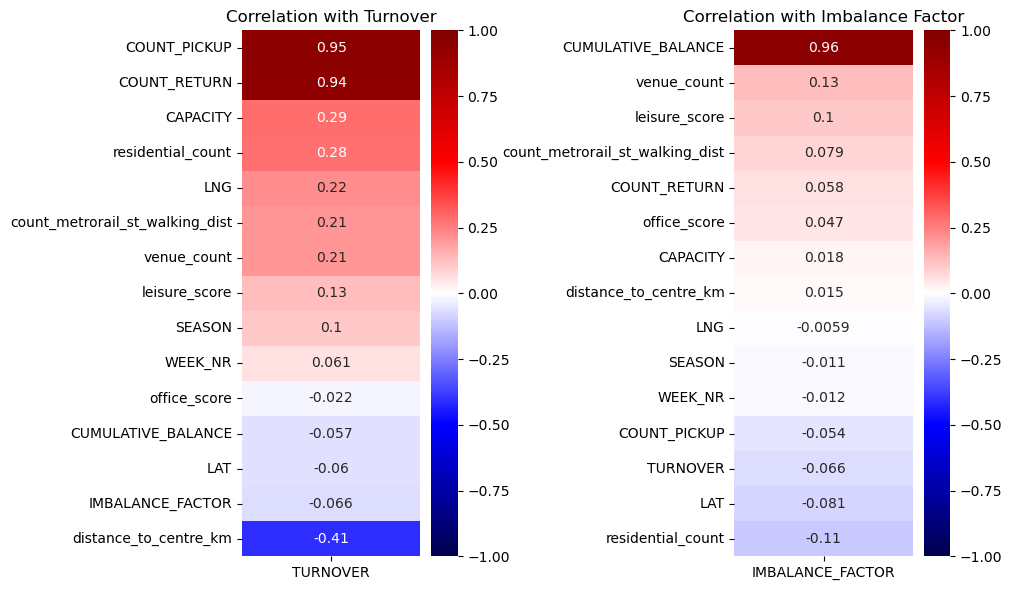

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrices
corr_turnover = df_cumulative_numeric.corr()[['TURNOVER']].drop('TURNOVER').sort_values(by='TURNOVER', ascending=False)
corr_imbalance = df_cumulative_numeric.corr()[['IMBALANCE_FACTOR']].drop('IMBALANCE_FACTOR').sort_values(by='IMBALANCE_FACTOR', ascending=False)

# Create a figure with 1 row and 2 columns for side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot the correlation matrix for 'TURNOVER'
sns.heatmap(corr_turnover, annot=True, vmin=-1, vmax=1, cmap='seismic', ax=axes[0])
axes[0].set_title("Correlation with Turnover")

# Plot the correlation matrix for 'IMBALANCE_FACTOR'
sns.heatmap(corr_imbalance, annot=True, vmin=-1, vmax=1, cmap='seismic', ax=axes[1])
axes[1].set_title("Correlation with Imbalance Factor")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [38]:
multivariate = df_cumulative_numeric.drop(['TURNOVER', 'WEEK_NR', 'LAT', 'LNG', 'COUNT_PICKUP', 'COUNT_RETURN', 'CUMULATIVE_BALANCE', 'IMBALANCE_FACTOR'], axis='columns')
turnover = df_cumulative_numeric['TURNOVER']

print(multivariate.shape)
print(turnover.shape)

(41392, 8)
(41392,)


In [39]:
type(turnover)

pandas.core.series.Series

In [40]:
multivariate.columns

Index(['SEASON', 'CAPACITY', 'distance_to_centre_km', 'office_score',
       'count_metrorail_st_walking_dist', 'leisure_score', 'residential_count',
       'venue_count'],
      dtype='object')

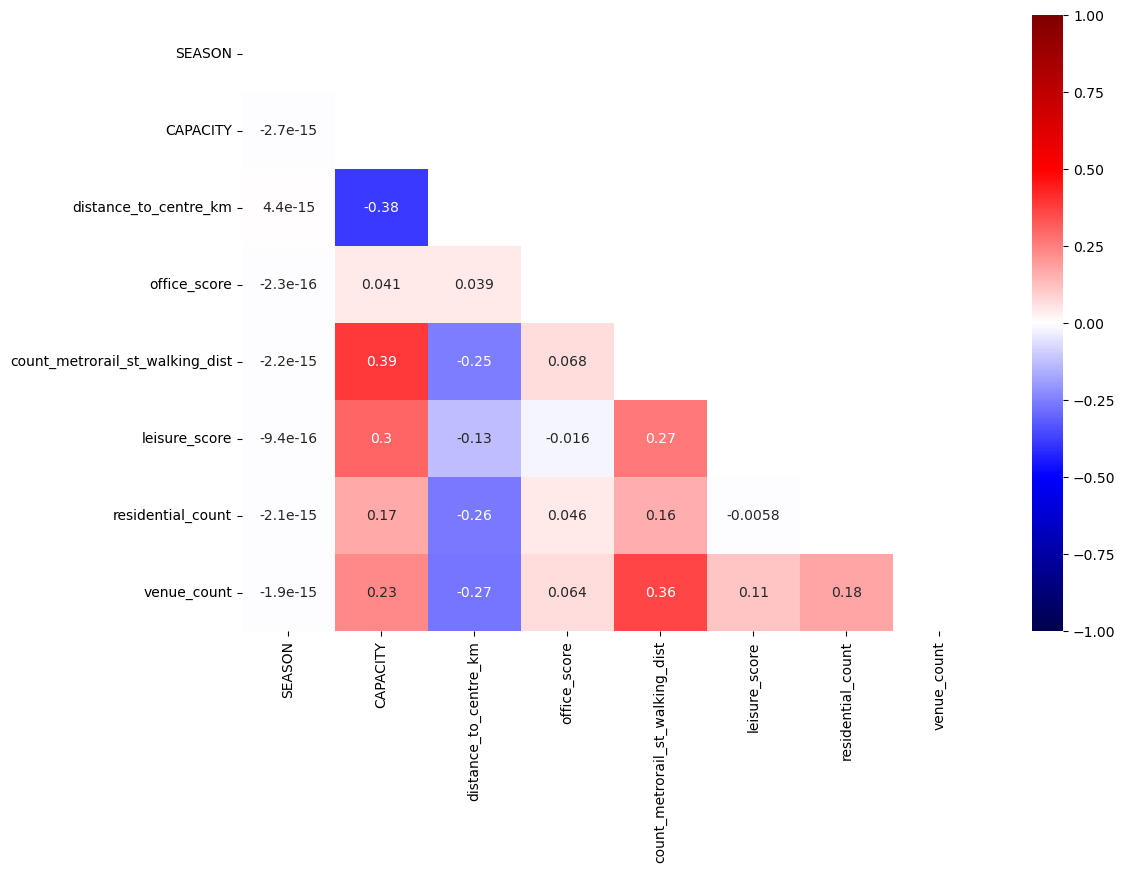

In [41]:
import seaborn as sns

plt.figure(figsize=(12,8))
corr= multivariate.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [42]:
# Reshape the dfs to have value for the column instead of a null.
turnover = turnover.values.reshape(-1, 1)
print(turnover.shape)

(41392, 1)


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Split into train and test sets
multivariate_01_train, multivariate_01_test, turnover_train, turnover_test = train_test_split(multivariate, turnover, test_size=0.2, random_state=420)

# Train the model
# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(multivariate_01_train, turnover_train.ravel())


GradientBoostingRegressor(random_state=42)

Mean Absolute Error (MAE): 0.5491465478464327
Mean Squared Error (MSE): 1.484341926261252
Root Mean Squared Error (RMSE): 1.2183357198495217
R^2 Score: 0.5062332304808996


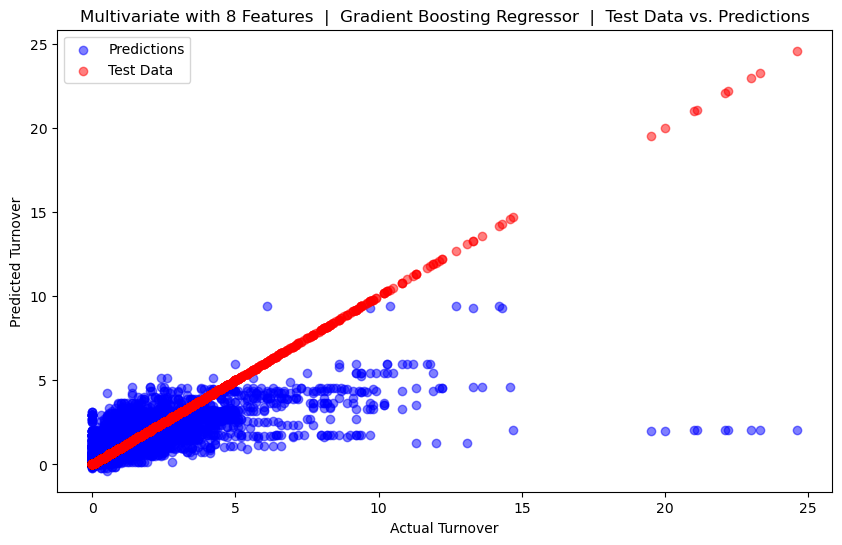

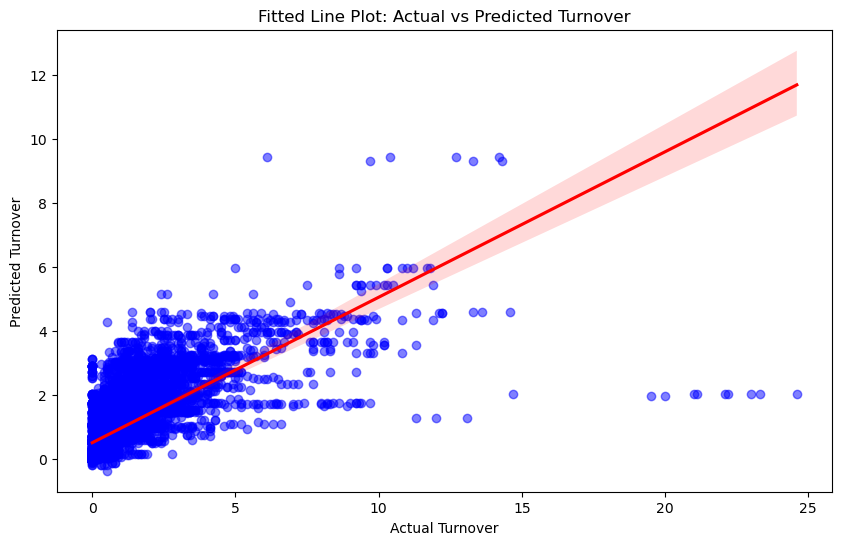

ValueError: x and y must be the same size

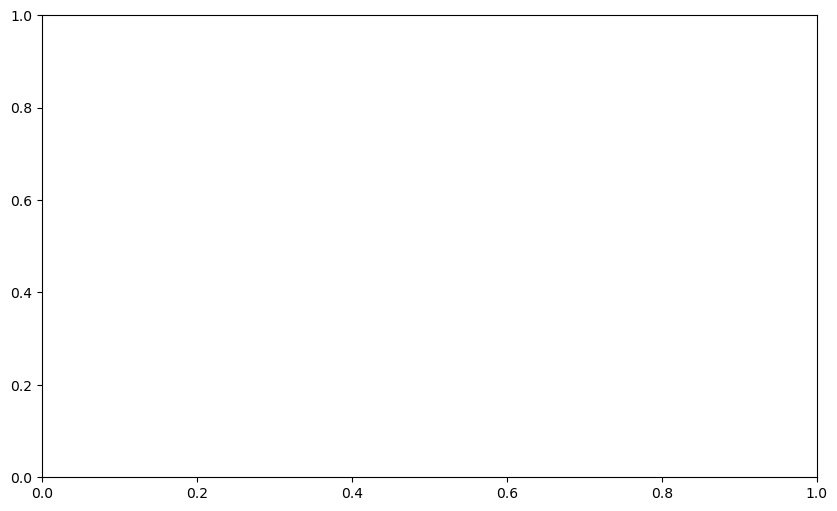

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict values using test data.
# reg_multi_score = (model.score(multivariate_01_test, turnover_test) * 100).round(2)
# print("The accuracy of the ML model is:", reg_multi_score , "%")

# Predict the values for the test data
predictions = model.predict(multivariate_01_test)

# Calculate evaluation metrics
mae = mean_absolute_error(turnover_test, predictions)
mse = mean_squared_error(turnover_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(turnover_test, predictions)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(turnover_test, predictions, color='blue', alpha=0.5, label='Predictions')
plt.scatter(turnover_test, turnover_test, color='red', alpha=0.5, label='Test Data')
plt.legend()
plt.xlabel('Actual Turnover')
plt.ylabel('Predicted Turnover')
plt.title('Multivariate with 8 Features  |  Gradient Boosting Regressor  |  Test Data vs. Predictions')
plt.show()

# Plot the fitted line
plt.figure(figsize=(10, 6))
sns.regplot(x=turnover_test.flatten(), y=predictions, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Actual Turnover')
plt.ylabel('Predicted Turnover')
plt.title('Fitted Line Plot: Actual vs Predicted Turnover')
plt.show()

# Ensure turnover_test and predictions have the same size
if len(turnover_test) == len(predictions):
	# Calculate residuals
	residuals = turnover_test - predictions

	# Plot Residuals versus Fits
	plt.figure(figsize=(10, 6))
	plt.scatter(predictions, residuals, color='blue', alpha=0.5)
	plt.axhline(y=0, color='red', linestyle='--')
	plt.xlabel('Fitted Values (Predicted Turnover)')
	plt.ylabel('Residuals')
	plt.title('Residuals versus Fits')
	plt.show()
else:
	print("Error: turnover_test and predictions must have the same size.")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Split into train and test sets
multivariate_01_train, multivariate_01_test, turnover_train, turnover_test = train_test_split(multivariate, turnover, test_size=0.2, random_state=420)

# Train the model
# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(
    random_state=42, 
    n_estimators=2400,  # Increase the number of trees
    learning_rate=0.05,  # Lower learning rate for better generalization
    max_depth=10,  # Increase depth for capturing complex patterns
    min_samples_split=250,  # Minimum samples required to split an internal node
    min_samples_leaf=25  # Minimum samples required to be at a leaf node
)
model.fit(multivariate_01_train, turnover_train.ravel())

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=25,
                          min_samples_split=250, n_estimators=2400,
                          random_state=42)

Mean Absolute Error (MAE): 0.26477090098266176
Mean Squared Error (MSE): 0.35376762387195554
Root Mean Squared Error (RMSE): 0.594783678215833
R^2 Score: 0.8823190979724713


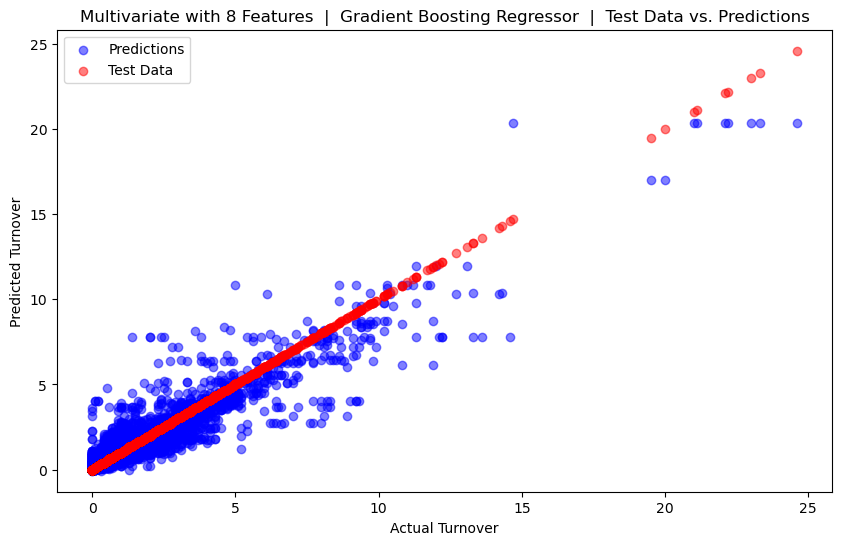

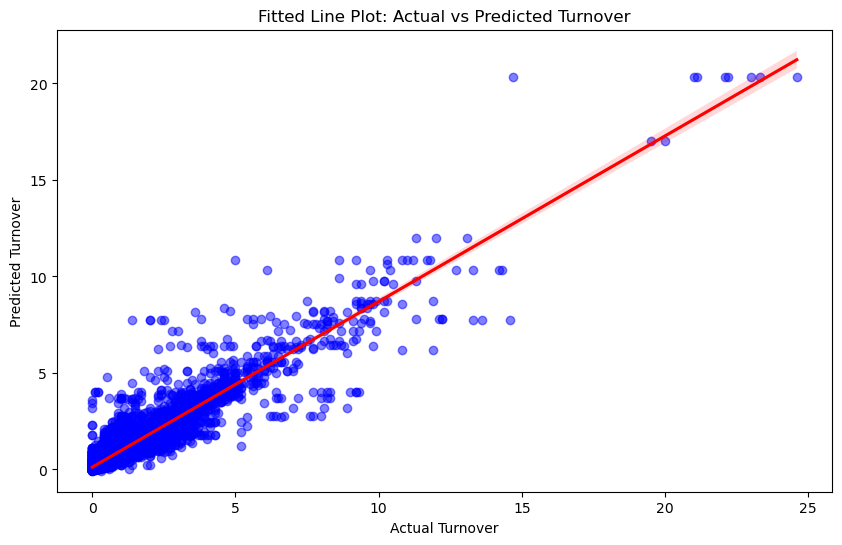

ValueError: x and y must be the same size

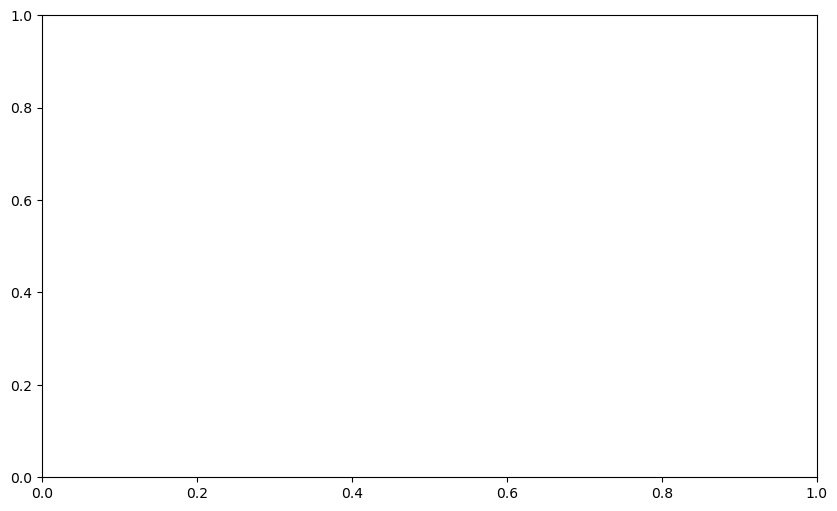

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict values using test data.
# reg_multi_score = (model.score(multivariate_01_test, turnover_test) * 100).round(2)
# print("The accuracy of the ML model is:", reg_multi_score , "%")

# Predict the values for the test data
predictions = model.predict(multivariate_01_test)

# Calculate evaluation metrics
mae = mean_absolute_error(turnover_test, predictions)
mse = mean_squared_error(turnover_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(turnover_test, predictions)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(turnover_test, predictions, color='blue', alpha=0.5, label='Predictions')
plt.scatter(turnover_test, turnover_test, color='red', alpha=0.5, label='Test Data')
plt.legend()
plt.xlabel('Actual Turnover')
plt.ylabel('Predicted Turnover')
plt.title('Multivariate with 8 Features  |  Gradient Boosting Regressor  |  Test Data vs. Predictions')
plt.show()

# Plot the fitted line
plt.figure(figsize=(10, 6))
sns.regplot(x=turnover_test.flatten(), y=predictions, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Actual Turnover')
plt.ylabel('Predicted Turnover')
plt.title('Fitted Line Plot: Actual vs Predicted Turnover')
plt.show()

# Ensure turnover_test and predictions have the same size
if len(turnover_test) == len(predictions):
	# Calculate residuals
	residuals = turnover_test - predictions

	# Plot Residuals versus Fits
	plt.figure(figsize=(10, 6))
	plt.scatter(predictions, residuals, color='blue', alpha=0.5)
	plt.axhline(y=0, color='red', linestyle='--')
	plt.xlabel('Fitted Values (Predicted Turnover)')
	plt.ylabel('Residuals')
	plt.title('Residuals versus Fits')
	plt.show()
else:
	print("Error: turnover_test and predictions must have the same size.")

Shopping List for continuation

1) use multivariate01 and perform polynomial regression

2) go back to df_numeric_balance, do 1.5 / 2.5 / 3.5 IQR check on 'TURNOVER', then do step by step, i.e. remove only 3.5 then 2.5, then 1.5 and see how the multivariate GBR is improving!?

